In [1]:
# Import packages
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt
import scipy

# from tqdm import tqdm
import seaborn as sns

# load in bettor objects

from bettor import bettor, run_market, plot_returns, run_market_fixed_el, gen_election

In [2]:
from statsmodels.tsa.stattools import grangercausalitytests

In [3]:
from matplotlib.colors import LinearSegmentedColormap

In [4]:
colors = [
    "#CC99FF",  # lavender purple (existing)
    "#000080",  # navy blue (existing)
    "#339966",  # forest green (existing)
    "#F4A261",  # muted orange
    "#B22222",  # deep ruby red
    "#6A4C93",  # royal violet
    "#1D3557",  # dark indigo
    "#2A9D8F",  # teal
    "#457B9D",   # steel blue,
    "#FFB347",  # warm amber/orange
    "#E63946"  # deep crimson red
]

# define mpl colourmap
cmap= LinearSegmentedColormap.from_list("power_predictioncmap", colors)

In [5]:
from collections.abc import Iterable

# need a function to flatten irregular list of lists
def flatten(xs):
    for x in xs:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            yield from flatten(x)
        else:
            yield x

In [6]:
def evaluate_markets(market_record, maxlag=5):
    mp = np.array(market_record['price_history'])
    tp = np.array(market_record['gen_el'])

    # take first differences
    tp_diff = np.diff(tp)
    mp_diff = np.diff(mp)
    ts_data = np.column_stack([mp_diff, tp_diff])

    mse = np.mean((mp-tp)**2)

    res = grangercausalitytests(ts_data, maxlag=maxlag, addconst=True, verbose=False)

    # pull p-values from one of the tests at each lag (e.g., ssr_ftest)
    pvals = {lag: res[lag][0]['ssr_ftest'][1] for lag in res}

    # decide significance at, say, 5%
    sig_lags = [lag for lag, p in pvals.items() if p < 0.05]
    # best_lag = min(sig_lags) if sig_lags else None

    # get lag with lowest p-value
    if pvals:
        best_lag = min(pvals, key=pvals.get)
    else:
        best_lag = None

    return mse, best_lag

In [7]:
# Global parameters

N_bettors = 100
T_max = 100
initial_price = 0.5
rw_variance = 0.05

# number of iterations for each set of parameters
n_iter_ = 30

In [8]:
# Set initial input values to the betting market function
parameters = {'n_bettors': N_bettors, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': T_max, # Time until election takes place (ie. time horizon of betting)
            'initial_price': initial_price, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': rw_variance} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability

parameters.update({'bettors': [bettor(budget=100) for _ in range(parameters['n_bettors'])] + [bettor(budget=200, market_valuation=1,whale=True)]})


In [9]:
market_record = run_market(**parameters)

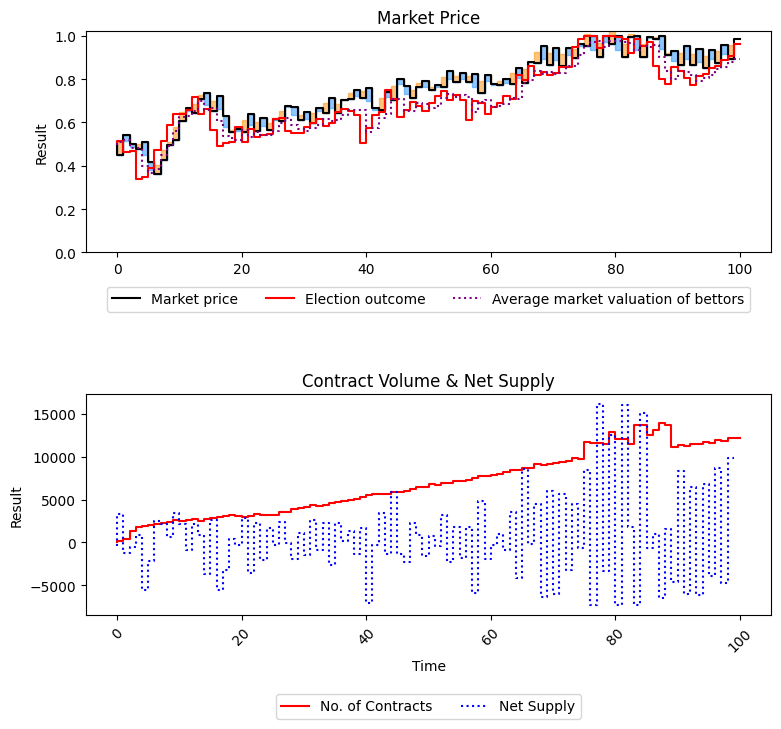

In [10]:
plot_returns(market_record, scale_fact=15, step=True)

# Plot 1 - parameter sweep
- Increasing expertise (we expect this reduces error)
- Increasing bias
- Increasing the correlation of budget and bias (choose a value from previous plot)
- Increasing variance of budget
- Increasing average risk adversity
- Increasing stubbornness

In [11]:
results_dict = {}

In [12]:
# set seed
np.random.seed(0)

results = []

# Set initial input values to the betting market function
parameters = {'n_bettors': N_bettors, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': T_max, # Time until election takes place (ie. time horizon of betting)
            'initial_price': initial_price, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': rw_variance} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


for e in np.arange(0,1.1,0.1):
    parameters.update({'bettors': [bettor(expertise=e) for _ in range(parameters['n_bettors'])]})
    for _ in range(n_iter_):
        market_record = run_market(**parameters)
        mse, min_sig_lag = evaluate_markets(market_record)
        results.append([e, mse, min_sig_lag])

results_dict['expertise'] = np.array(results)

/opt/homebrew/Caskroom/miniforge/base/envs/power_prediction/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [13]:
# set seed
np.random.seed(0)

results = []

# Set initial input values to the betting market function
parameters = {'n_bettors': N_bettors, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': T_max, # Time until election takes place (ie. time horizon of betting)
            'initial_price': initial_price, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': rw_variance} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


for b in np.arange(-0.3,0.3,0.05):
    parameters.update({'bettors': [bettor(bias=b) for _ in range(parameters['n_bettors'])]})
    for _ in range(n_iter_):
        market_record = run_market(**parameters)
        mse, min_sig_lag = evaluate_markets(market_record)
        results.append([b, mse, min_sig_lag])

results_dict['bias'] = np.array(results)

/opt/homebrew/Caskroom/miniforge/base/envs/power_prediction/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [14]:
# set seed
np.random.seed(0)

results = []

# Set initial input values to the betting market function
parameters = {'n_bettors': N_bettors, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': T_max, # Time until election takes place (ie. time horizon of betting)
            'initial_price': initial_price, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': rw_variance} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


for ra in np.arange(0,1.1,0.1):
    parameters.update({'bettors': [bettor(risk_av=ra) for _ in range(parameters['n_bettors'])]})
    for _ in range(n_iter_):
        market_record = run_market(**parameters)
        mse, min_sig_lag = evaluate_markets(market_record)
        results.append([ra, mse, min_sig_lag])

results_dict['risk_adversity'] = np.array(results)

In [15]:
# set seed
np.random.seed(0)

results = []


# Set initial input values to the betting market function
parameters = {'n_bettors': N_bettors, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': T_max, # Time until election takes place (ie. time horizon of betting)
            'initial_price': initial_price, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': rw_variance} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability

for s in np.arange(0.05,1,0.05):
    parameters.update({'bettors': [bettor(stubbornness=s) for _ in range(parameters['n_bettors'])]})
    for _ in range(n_iter_):
        market_record = run_market(**parameters)
        mse, min_sig_lag = evaluate_markets(market_record)
        results.append([s, mse, min_sig_lag])

results_dict['stubbornness'] = np.array(results)

In [16]:
# set seed
np.random.seed(0)

results = []


# Set initial input values to the betting market function
parameters = {'n_bettors': N_bettors, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': T_max, # Time until election takes place (ie. time horizon of betting)
            'initial_price': initial_price, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': rw_variance} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability

for v in np.arange(0,500,50):
    for _ in range(n_iter_):
        budget_samples = np.clip(np.random.normal(500, v, N_bettors),0,None)
        parameters.update({'bettors': [bettor(budget=budget_samples[i]) for i in range(parameters['n_bettors'])]})
    
        market_record = run_market(**parameters)
        mse, min_sig_lag = evaluate_markets(market_record)
        results.append([v, mse, min_sig_lag])
        
results_dict['budget_variance'] = np.array(results)

### Plots

Text(0.5, 1.0, 'Min Lag for Significant GC')

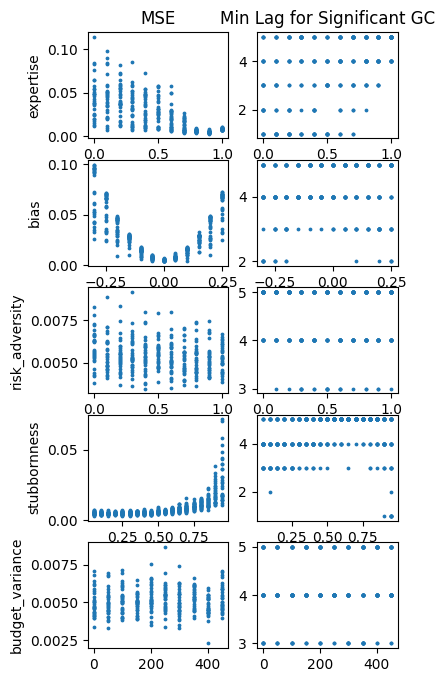

In [22]:
fig, ax = plt.subplots(len(results_dict.keys()),2,figsize=(4,8))
axs = ax.ravel()

i=0
for k in results_dict.keys():
#     arr=results_dict[k]
#     rows, row_pos = np.unique(arr[:, 0], return_inverse=True)
#     cols, col_pos = np.unique(arr[:, 1], return_inverse=True)
#     pivoted_arr3 = np.zeros((len(rows), len(cols)))
#     pivoted_arr3[row_pos, col_pos] = arr[:, 2]

#     axs[i].boxplot(pivoted_arr3.T,positions=rows)
    axs[i].scatter(x=results_dict[k][:,0],y=results_dict[k][:,1],s=3)
    axs[i].set_ylabel(k)
    
    i+=1
    axs[i].scatter(x=results_dict[k][:,0],y=results_dict[k][:,2],s=3)
    i+=1

axs[0].set_title('MSE')
axs[1].set_title('Min Lag for Significant GC')

In [28]:
arr = results_dict['expertise']

arr[:, 2]

array([5., 3., 3., 4., 4., 3., 2., 3., 2., 2., 2., 1., 4., 5., 2., 4., 5.,
       1., 5., 1., 4., 1., 4., 3., 1., 2., 3., 2., 3., 1., 4., 3., 2., 5.,
       3., 4., 5., 1., 1., 1., 1., 3., 1., 1., 4., 2., 1., 5., 3., 4., 5.,
       1., 3., 3., 5., 4., 4., 1., 2., 1., 3., 3., 5., 2., 5., 5., 5., 1.,
       5., 2., 5., 1., 2., 2., 2., 5., 4., 2., 1., 4., 4., 1., 4., 5., 1.,
       4., 1., 1., 1., 1., 3., 4., 4., 5., 4., 5., 5., 5., 5., 4., 5., 3.,
       5., 1., 5., 1., 5., 4., 1., 2., 5., 4., 3., 5., 4., 5., 1., 5., 1.,
       5., 5., 4., 3., 4., 5., 4., 5., 3., 3., 4., 1., 5., 1., 2., 1., 2.,
       2., 2., 1., 5., 4., 2., 5., 4., 1., 2., 1., 1., 4., 5., 3., 5., 3.,
       5., 4., 3., 4., 5., 5., 1., 1., 4., 3., 3., 1., 5., 4., 1., 3., 3.,
       1., 4., 3., 4., 1., 1., 3., 3., 4., 4., 4., 5., 4., 3., 4., 5., 4.,
       5., 3., 4., 5., 2., 4., 2., 5., 4., 5., 5., 4., 5., 4., 3., 1., 1.,
       5., 3., 1., 2., 4., 4., 4., 5., 5., 4., 4., 5., 5., 4., 5., 5., 3.,
       5., 5., 5., 5., 4.

/var/folders/wp/758jq81s3hs0jlp8_31261sc0000gn/T/ipykernel_29826/211781218.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df.groupby('bin')


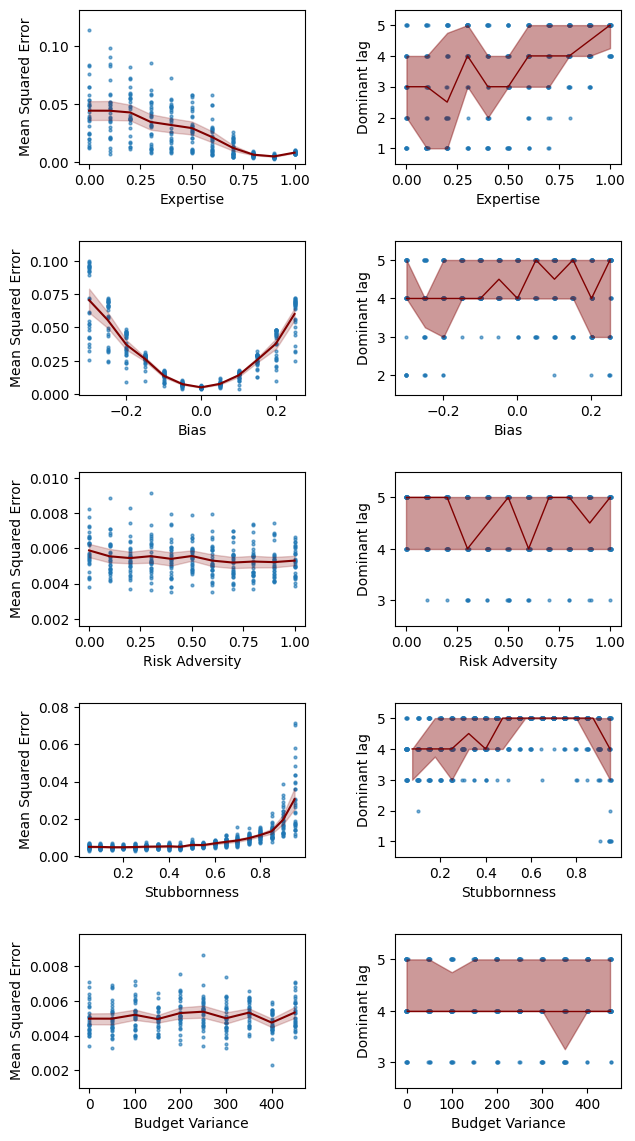

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots(len(results_dict.keys()), 2, figsize=(7, 14))
plt.subplots_adjust(hspace=0.5, wspace=0.4)
axs = ax.ravel()

i = 0
for k in results_dict.keys():
    if k == 'Exponetial budget':
        continue

    arr = results_dict[k]
    params = arr[:, 0]
    mse = arr[:, 1]

    # Left: MSE (same as before)
    axs[i].scatter(x=params, y=mse, s=4, alpha=0.6)
    sns.lineplot(x=params, y=mse, ax=axs[i], color='maroon')
    axs[i].set_xlabel(k.replace("_"," ").title())
    axs[i].set_ylabel('Mean Squared Error')
    y1, y2 = axs[i].get_ylim()
    axs[i].set_ylim(0.5 * y1, 1.1 * y2)

    i += 1

    dominant_lag = arr[:, 2]

    # Jitter scatter for readability
    jitter = (np.random.rand(len(params)) - 0.5) * ( (np.max(params) - np.min(params)) * 0.01 + 1e-6 )
    axs[i].scatter(x=params + jitter, y=dominant_lag, s=4, alpha=0.6)

    # Summary line: compute median and IQR in parameter bins
    df = pd.DataFrame({'param': params, 'lag': dominant_lag})
    # choose bins: if param has few unique values, use them; otherwise use quantile bins
    if len(np.unique(params)) <= 12:
        # group by unique param values
        grp = df.groupby('param')
        x_centers = np.array(list(grp.groups.keys()))
        med = grp['lag'].median().values
        q1 = grp['lag'].quantile(0.25).values
        q3 = grp['lag'].quantile(0.75).values
    else:
        # use 12 even quantile bins
        df['bin'] = pd.qcut(df['param'], q=12, duplicates='drop')
        grp = df.groupby('bin')
        # x center for each bin
        x_centers = grp['param'].median().values
        med = grp['lag'].median().values
        q1 = grp['lag'].quantile(0.25).values
        q3 = grp['lag'].quantile(0.75).values

    # Plot median line and IQR shading
    axs[i].plot(x_centers, med, color='maroon', linewidth=1)

    axs[i].fill_between(x_centers, q1, q3, color='maroon', alpha=0.4, step=None)


    axs[i].set_xlabel(k.replace("_"," ").title())
    axs[i].set_ylabel('Dominant lag')
    # tighten y-limits with small margin
    y_min, y_max = np.min(dominant_lag), np.max(dominant_lag)
    axs[i].set_ylim(max(y_min - 0.5, -0.5), y_max + 0.5)

    i += 1

plt.savefig('P1_results_combined.pdf', bbox_inches='tight')
plt.show()


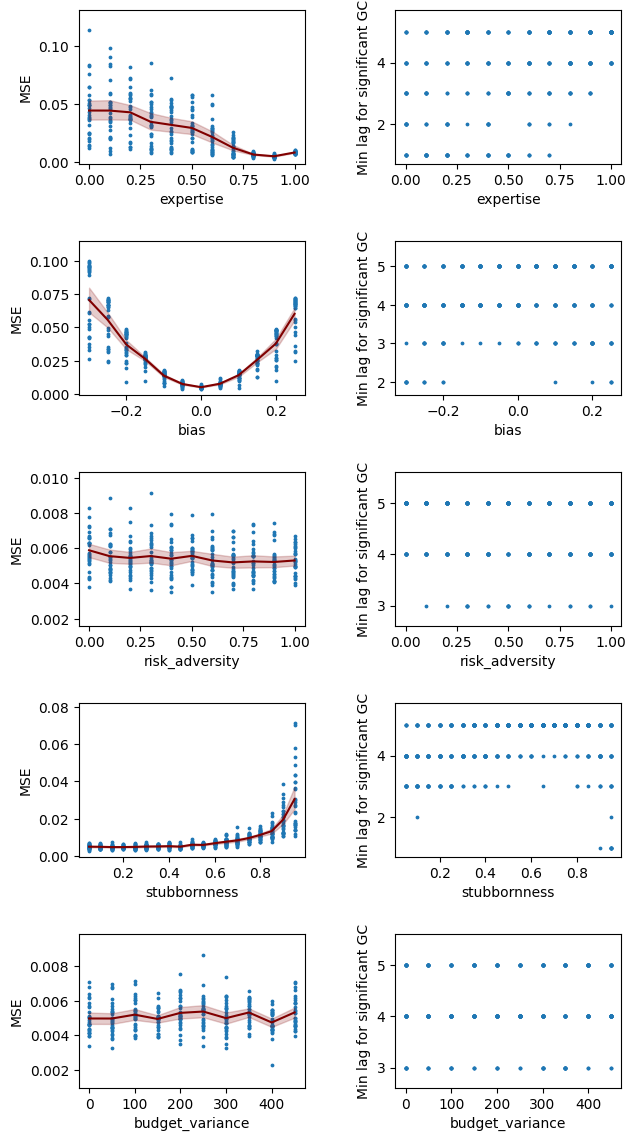

In [24]:
fig, ax = plt.subplots(len(results_dict.keys()),2,figsize=(7,14))
plt.subplots_adjust(hspace=0.5,wspace=0.4)
axs = ax.ravel()

i=0
for k in results_dict.keys():
    if k=='Exponetial budget':
        continue
#     arr=results_dict[k]:
#     rows, row_pos = np.unique(arr[:, 0], return_inverse=True)
#     cols, col_pos = np.unique(arr[:, 1], return_inverse=True)
#     pivoted_arr3 = np.zeros((len(rows), len(cols)))
#     pivoted_arr3[row_pos, col_pos] = arr[:, 2]
#     axs[i].boxplot(pivoted_arr3.T,positions=rows)
    axs[i].scatter(x=results_dict[k][:,0],y=results_dict[k][:,1],s=3)
    sns.lineplot(x=results_dict[k][:,0],y=results_dict[k][:,1],ax=axs[i],c='maroon')
    axs[i].set_xlabel(k)
    axs[i].set_ylabel('MSE')
    y1,y2=axs[i].get_ylim()
    axs[i].set_ylim(0.5*y1,1.1*y2)
    
    i+=1
    axs[i].scatter(x=results_dict[k][:,0],y=results_dict[k][:,2],s=3)
    # sns.lineplot(x=results_dict[k][:,0],y=results_dict[k][:,2],ax=axs[i],c='maroon')
    y1,y2=axs[i].get_ylim()
    axs[i].set_ylim(0.9*y1,1.1*y2)
    axs[i].set_xlabel(k)
    axs[i].set_ylabel('Min lag for significant GC')
    i+=1

# axs[0].set_title('MSE')
# axs[1].set_title('Maxmimum cross-correlation')
plt.savefig('P1_results_combined.pdf', bbox_inches='tight')

In [46]:
import pickle

with open('results/plot1_simulation_results10O.json', 'wb') as fp:
    pickle.dump(results_dict, fp)

# Plot 2 - Well informed bettors gain market influence and capital

In [47]:
# set seed
np.random.seed(0)
initial_budget=100

expertise_store = []
budgets = []

# Set initial input values to the betting market function
parameters = {'n_bettors': N_bettors, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': T_max, # Time until election takes place (ie. time horizon of betting)
            'initial_price': initial_price, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': rw_variance} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


expertise_values = np.linspace(0,1,N_bettors)


parameters.update({'bettors': [bettor(expertise=e, budget=initial_budget) for e in expertise_values]})

for _ in range(n_iter_):
    market_record = run_market(**parameters)
    mse, min_sig_lag = evaluate_markets(market_record)
    expertise_store.append([expertise_values])
    budgets.append([x-initial_budget for x in market_record['final_budgets']])


# now with a whale


/opt/homebrew/Caskroom/miniforge/base/envs/power_prediction/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [48]:
# save the expertise_store and budgets_store
import pickle

to_save = {'expertise':list(flatten(expertise_store)), 'budgets':list(flatten(budgets))}

with open('expertise_nowhale_10O.pkl','wb') as f:
    pickle.dump(to_save,f)

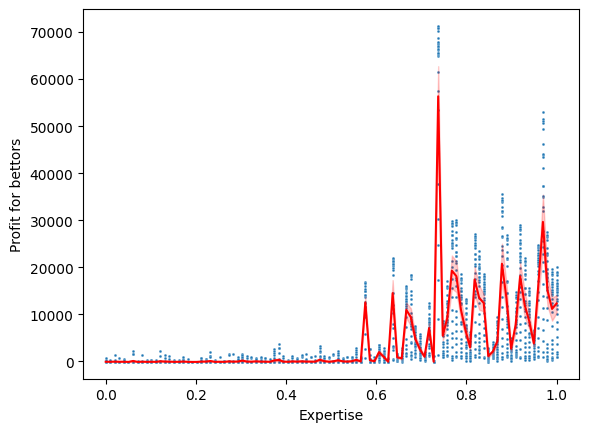

In [55]:
sns.scatterplot(x=list(flatten(expertise_store)),y=list(flatten(budgets)), s=4)
sns.lineplot(x=list(flatten(expertise_store)),y=list(flatten(budgets)),c='red', errorbar=("ci", 95))

plt.xlabel('Expertise')
plt.ylabel('Profit for bettors')
plt.savefig('expertise_nowhale.pdf')

# P3 PM is resistant to manipulation by whales

In [68]:
rw_variance

0.05

In [70]:
N_bettors=200

In [72]:
n_iter_=100

In [73]:
# Set initial input values to the betting market function
parameters = {'n_bettors': N_bettors, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': T_max, # Time until election takes place (ie. time horizon of betting)
            'initial_price': initial_price, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': rw_variance} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


expertise_values = np.linspace(0,1,N_bettors)

av_budget=100
budget_total = av_budget* N_bettors
N_whales = 1

expertise_whale = {}

for prop_whale in [0,0.01,0.1,0.25,0.5]:
    
    expertise_store_whale = []
    budgets_whale = []

    whale_budget = av_budget*N_bettors*prop_whale / (1-prop_whale)

    non_whale_bettors = [bettor(budget=av_budget, expertise=expertise_values[i]) for i in range(N_bettors)]
    whale_bettors = [bettor(budget=whale_budget, whale=True, market_valuation=1) for _ in range(N_whales)]

    parameters.update({'bettors': non_whale_bettors + whale_bettors})

    for _ in range(n_iter_):
        market_record = run_market(**parameters)
        expertise_store_whale.append([expertise_values])
        budgets_whale.append([x-av_budget for x in market_record['final_budgets'][:-1]])

    expertise_whale[prop_whale] = [expertise_store_whale, budgets_whale]

In [74]:
for k,v in expertise_whale.items():
    budgets_whale = v[1] - np.min(v[1])
    expertise_whale[k].append((np.array(budgets_whale))/ np.max(budgets_whale))

In [75]:
with open('expertise_whale_200.pkl','wb') as f:
    pickle.dump(expertise_whale,f)

In [76]:
props = list(expertise_whale.keys())
props.sort()

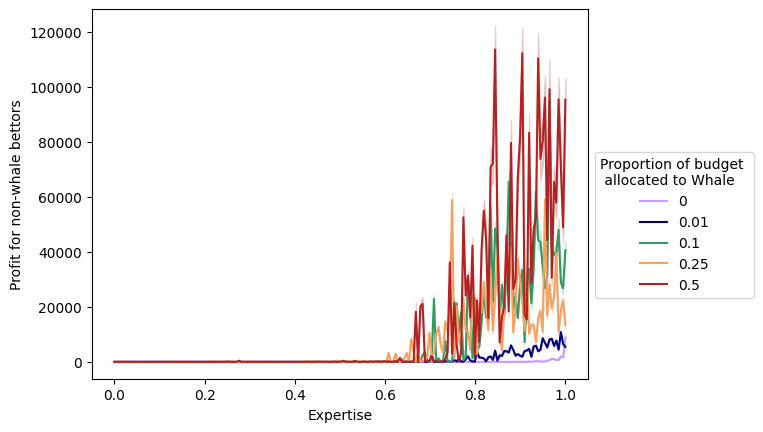

In [77]:
index_color=0
for prop_whale in props:
    expertise_store = expertise_whale[prop_whale][0]
    budgets = expertise_whale[prop_whale][1]
    # sns.scatterplot(x=list(flatten(expertise_store)),y=list(flatten(budgets)), s=1,c = colors[index_color])
    sns.lineplot(x=list(flatten(expertise_store)),y=list(flatten(budgets)), label=round(prop_whale,2),c = colors[index_color], errorbar=("ci", 95))
    index_color += 1

plt.xlabel('Expertise')
plt.ylabel('Profit for non-whale bettors')
plt.legend(title = 'Proportion of budget \n allocated to Whale', loc='lower left', bbox_to_anchor=(1,0.2))
plt.savefig('expertise_whale.pdf', bbox_inches='tight')

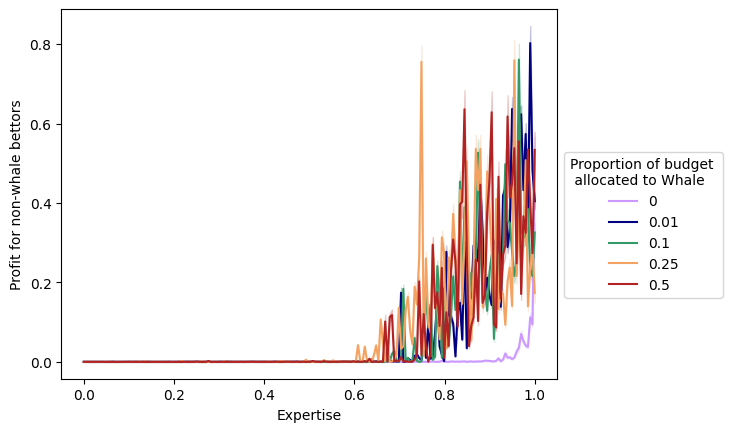

In [78]:
ind=0
for prop_whale in props:
    expertise_store = expertise_whale[prop_whale][0]
    budgets = expertise_whale[prop_whale][2]
    # sns.scatterplot(x=list(flatten(expertise_store)),y=list(flatten(budgets)), s=,c = colors[ind])
    sns.lineplot(x=list(flatten(expertise_store)),y=list(flatten(budgets)), label=round(prop_whale,2),c = colors[ind])
    ind += 1

plt.xlabel('Expertise')
plt.ylabel('Profit for non-whale bettors')
plt.legend(title = 'Proportion of budget \n allocated to Whale', loc='lower left', bbox_to_anchor=(1,0.2))
plt.savefig('expertise_whale_normalised.pdf', bbox_inches='tight')

In [95]:
# dataframe from dict
import pandas as pd
df_list = []
for k,v in expertise_whale.items():
    df_temp = pd.DataFrame({'expertise':list(flatten(v[0])), 'budgets':list(flatten(v[2])), 'prop_whale':[k for _ in range(len(list(flatten(v[0]))))]})
    df_list.append(df_temp)

# make a single dataframe
df_list = pd.concat(df_list, ignore_index=True)

In [133]:
for g, df_ in df_list.groupby('prop_whale'):
    print(f'Min expertise for a normalised profit above 0.1: {round(g,2)}, {round(np.min(df_[df_.budgets>0.1].expertise),4)}')

    # Compute cumulative budget share
    df_["cum_budget_share"] = df_["budgets"].cumsum() / df_["budgets"].sum()

    print("Expertise threshold for 10% of normalised profit:", round(df_.loc[df_["cum_budget_share"] >= 0.1].expertise.values[0],3))

Min expertise for a normalised profit above 0.1: 0.0, 0.899
Expertise threshold for 10% of normalised profit: 0.0
Min expertise for a normalised profit above 0.1: 0.02, 0.6566
Expertise threshold for 10% of normalised profit: 0.838
Min expertise for a normalised profit above 0.1: 0.05, 0.6566
Expertise threshold for 10% of normalised profit: 0.98
Min expertise for a normalised profit above 0.1: 0.08, 0.1313
Expertise threshold for 10% of normalised profit: 0.808
Min expertise for a normalised profit above 0.1: 0.1, 0.7576
Expertise threshold for 10% of normalised profit: 0.859
Min expertise for a normalised profit above 0.1: 0.2, 0.4141
Expertise threshold for 10% of normalised profit: 0.909
Min expertise for a normalised profit above 0.1: 0.3, 0.6667
Expertise threshold for 10% of normalised profit: 0.667
Min expertise for a normalised profit above 0.1: 0.4, 0.4848
Expertise threshold for 10% of normalised profit: 1.0
Min expertise for a normalised profit above 0.1: 0.5, 0.0303
Expert

In [ ]:
# get the expertise corresponding to the 25th percentile of expertise for the budgets
expertise_25th = df_.expertise[df_.budgets > 0.1].quantile(0.25)

np.float64(247.6916283593149)

In [106]:
# get weighted average expertise by budget for each prop_whale
weighted_expertise = df_list.groupby('prop_whale').apply(lambda x: np.average(x['expertise'], weights=x['budgets'])).reset_index()
weighted_expertise.columns = ['prop_whale', 'weighted_expertise']

/var/folders/wp/758jq81s3hs0jlp8_31261sc0000gn/T/ipykernel_24983/2062336582.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_expertise = df_list.groupby('prop_whale').apply(lambda x: np.average(x['expertise'], weights=x['budgets'])).reset_index()


<Axes: xlabel='prop_whale', ylabel='weighted_expertise'>

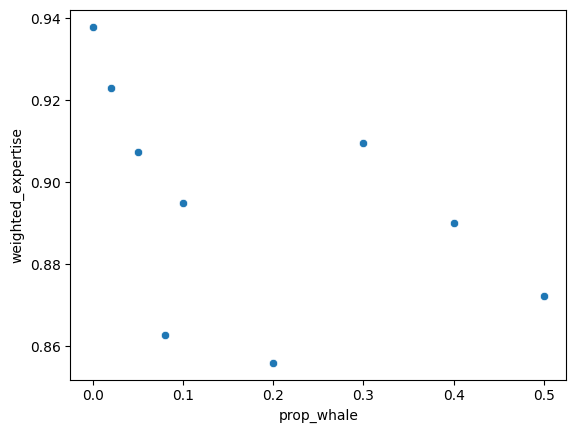

In [109]:
sns.scatterplot(data=weighted_expertise, x='prop_whale', y='weighted_expertise')

ValueError: Could not interpret value `weighted_expertise` for `y`. An entry with this name does not appear in `data`.

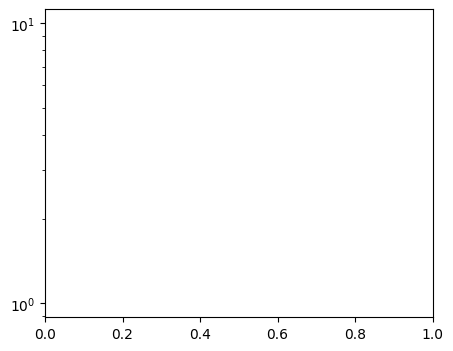

In [ ]:
# set up box plot
plt.figure(figsize=(5,4))
plt.yscale('log')
# make marker size smaller
sns.boxplot(data=df_list[df_list['expertise']<0.5], x='prop_whale', y='budgets', palette = colors, fliersize=1)
plt.xlabel('Proportion of budget allocated to Whale')
plt.ylabel('Normalized profit for non-whale bettors')

# round xtick labels to 1dp
plt.xticks(ticks=np.arange(len(props)), labels=[round(x, 2) for x in props])
plt.ylim(1e-7,10)
plt.savefig('expertise_whale_boxplot.pdf', bbox_inches='tight')

/var/folders/wp/758jq81s3hs0jlp8_31261sc0000gn/T/ipykernel_24983/4116126654.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_list[df_list['expertise']>=0.5], x='prop_whale', y='budgets', palette = colors, fliersize=1)
/var/folders/wp/758jq81s3hs0jlp8_31261sc0000gn/T/ipykernel_24983/4116126654.py:5: UserWarning: The palette list has more values (11) than needed (9), which may not be intended.
  sns.boxplot(data=df_list[df_list['expertise']>=0.5], x='prop_whale', y='budgets', palette = colors, fliersize=1)


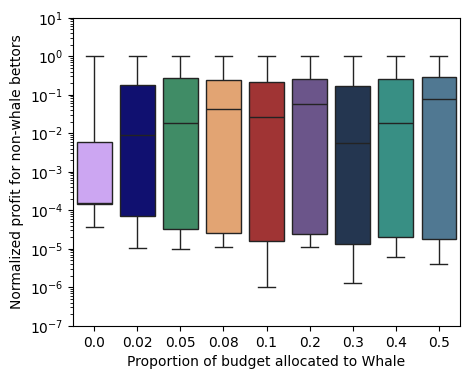

In [103]:
# set up box plot
plt.figure(figsize=(5,4))
plt.yscale('log')
# make marker size smaller
sns.boxplot(data=df_list[df_list['expertise']>=0.5], x='prop_whale', y='budgets', palette = colors, fliersize=1)
plt.xlabel('Proportion of budget allocated to Whale')
plt.ylabel('Normalized profit for non-whale bettors')

# round xtick labels to 1dp
plt.xticks(ticks=np.arange(len(props)), labels=[round(x, 2) for x in props])
plt.ylim(1e-7,10)
plt.savefig('expertise_whale_boxplot.pdf', bbox_inches='tight')

In [136]:
df_list['weighted_expertise'] = df_list.expertise * df_list.budgets

/var/folders/wp/758jq81s3hs0jlp8_31261sc0000gn/T/ipykernel_24983/403612874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_list, x='prop_whale', y='weighted_expertise', palette = colors, fliersize=1)
/var/folders/wp/758jq81s3hs0jlp8_31261sc0000gn/T/ipykernel_24983/403612874.py:5: UserWarning: The palette list has more values (11) than needed (9), which may not be intended.
  sns.boxplot(data=df_list, x='prop_whale', y='weighted_expertise', palette = colors, fliersize=1)


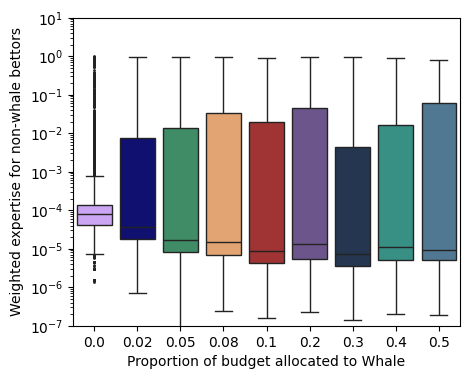

In [142]:
# set up box plot
plt.figure(figsize=(5,4))
plt.yscale('log')
# make marker size smaller
sns.boxplot(data=df_list, x='prop_whale', y='weighted_expertise', palette = colors, fliersize=1)
plt.xlabel('Proportion of budget allocated to Whale')
plt.ylabel('Weighted expertise for non-whale bettors')

# round xtick labels to 1dp
plt.xticks(ticks=np.arange(len(props)), labels=[round(x, 2) for x in props])
plt.ylim(1e-7,10)
plt.savefig('expertise_whale_boxplot.pdf', bbox_inches='tight')

### Market shock

In [19]:
# Set initial input values to the betting market function
parameters = {'n_bettors': N_bettors, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': T_max, # Time until election takes place (ie. time horizon of betting)
            'initial_price': initial_price, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': rw_variance} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


expertise_values = np.linspace(0,1,N_bettors)

av_budget=100
budget_total = av_budget* N_bettors
N_whales = 1
whale_valuation = 0.6

expertise_whale = {}

for prop_whale in np.arange(0,0.55,0.1):
    
    whale_effect = []

    whale_budget = av_budget*N_bettors*prop_whale / (1-prop_whale)

    non_whale_bettors = [bettor(budget=av_budget, expertise=expertise_values[i]) for i in range(N_bettors)]
    whale_bettors = [bettor(budget=whale_budget, whale=True, market_valuation=whale_valuation) for _ in range(N_whales)]

    parameters.update({'bettors': non_whale_bettors + whale_bettors})

    for _ in range(n_iter_):
        market_record = run_market(**parameters)

        whale_effect.append((np.array(market_record['price_history']) -  np.array(market_record['gen_el'])))

    expertise_whale[prop_whale] = whale_effect

In [20]:
times = np.arange(T_max+1)
vals = []
for k,val in expertise_whale.items():
    for v in val:
        for x in range(T_max+1):
            vals.append([k,v[x],times[x]])


df_plot = pd.DataFrame(vals, columns = ['PropWhale','SE','T'])

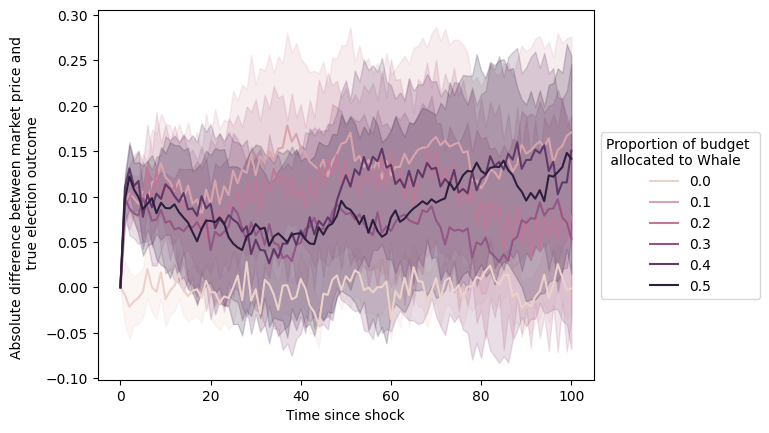

In [21]:

sns.lineplot(data = df_plot, x='T', y='SE',hue='PropWhale')
plt.xlabel('Time since shock')
plt.legend(title = 'Proportion of budget \n allocated to Whale', loc='lower left', bbox_to_anchor=(1,0.2))
plt.ylabel('Absolute difference between market price and \n true election outcome')
# round labels in legend to 1dp
# get current legend
legend = plt.gca().get_legend()
for text in legend.get_texts():
    text.set_text(f"{float(text.get_text()):.1f}")
plt.savefig('ShockDuration.pdf', bbox_inches='tight')

### whales in the market

In [79]:
mv=0.6
N=100

In [82]:

r_arr = np.array(results)
with open(f'whale_{mv}_{N}.pkl', 'rb') as f:
    results = pickle.load(f)


In [85]:
results[:,2] = [x['lag'] for x in results[:,2]]

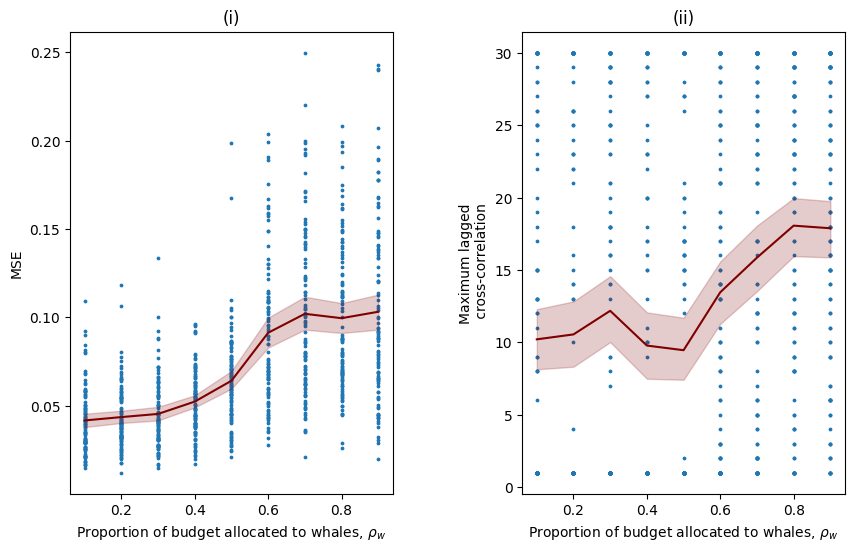

In [87]:

# modify the simulation to multiprocess
fig, axs = plt.subplots(1,2,figsize=(10,6))
plt.subplots_adjust(wspace=0.4)
axs[0].scatter(x=results[:,0],y=results[:,1],s=3)
sns.lineplot(x=results[:,0],y=results[:,1],c='maroon',ax=axs[0])
axs[0].set_ylabel('MSE')
axs[0].set_xlabel(r'Proportion of budget allocated to whales, $\rho_w$')
# plt.suptitle(f'Single whale with internal valuation of {mv}')
axs[0].set_title('(i)')
axs[1].set_title('(ii)')
axs[1].scatter(x=results[:,0],y=results[:,2],s=3)
sns.lineplot(x=results[:,0],y=results[:,2],c='maroon',ax=axs[1])
axs[1].set_ylabel('Maximum lagged\n cross-correlation')
axs[1].set_xlabel(r'Proportion of budget allocated to whales, $\rho_w$')

plt.savefig(f'whales_{mv}_{N}.pdf', bbox_inches='tight')

# P4 Herding behaviour

In [24]:
av_budget=100

T_max = 10

initial_price = 0.5
rw_variance = 0.05
alpha_store_shock = {}
market_error=0.3
n_iter_=30
N_bettors=100
var_save = []
case_save = []

for mkt_imitation, m_lambda in [(0,0.05),(0.3,0.05),(0.6,0.05),(0.9,0.05), (1,0.05),(0.3,0.5)]:
    # for mkt_imitation in [0,0.2,0.4,0.6,0.8,1]:
        alpha_effect = []
        parameters = {'n_bettors': N_bettors, # The number of betting agents
                    #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
                't_election': T_max, # Time until election takes place (ie. time horizon of betting)
                'initial_price': initial_price, # Initial market price (is this equivalent to probability of winning)
                'outcome_uncertainty': 0,
                'market_error':market_error,
                'market_lambda': m_lambda} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


        # b_numbers = N_bettors*np.array(case)
        # b_numbers = [int(x) for x in b_numbers]

        bettors_ = [bettor(budget=av_budget, market_imitation = mkt_imitation, stubbornness=0.1, expertise=0.9, market_valuation=initial_price) for i in range(N_bettors)]

            # alpha_1_bettors = [bettor(budget=av_budget, market_imitation = 0, stubbornness=0.01) for i in range(b_numbers[0])]
            # alpha_neg1_bettors = [bettor(budget=av_budget, market_imitation = 0.05, stubbornness=0.01) for i in range(b_numbers[1])]
            # no_alpha_bettors = [bettor(budget=av_budget, market_imitation = 1, stubbornness=0.01) for i in range(b_numbers[2])]

        parameters.update({'bettors': bettors_})# alpha_1_bettors + alpha_neg1_bettors + no_alpha_bettors})

        for _ in range(n_iter_):
            market_record = run_market(**parameters)

            alpha_effect.append((np.array(market_record['price_history']) -  np.array(market_record['gen_el'])))
            var_save.append(np.var(market_record['price_history']))
            case_save.append((mkt_imitation, m_lambda))

        alpha_store_shock[(mkt_imitation,m_lambda)] = alpha_effect

/var/folders/wp/758jq81s3hs0jlp8_31261sc0000gn/T/ipykernel_14760/2315947269.py:3: UserWarning: The palette list has more values (11) than needed (6), which may not be intended.
  sns.boxplot(data=df_plot_var, y='Var', hue='Case', palette = colors, fliersize=1, dodge=0.8)


<Axes: ylabel='Var'>

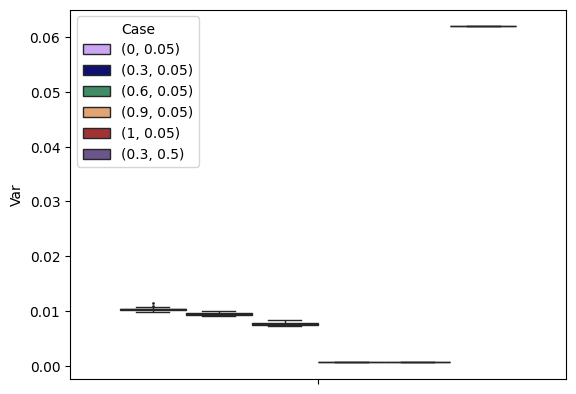

In [25]:
df_plot_var = pd.DataFrame({'Var':var_save, 'Case':case_save})

sns.boxplot(data=df_plot_var, y='Var', hue='Case', palette = colors, fliersize=1, dodge=0.8)

In [26]:
times = np.arange(T_max+1)
vals = []
for k,val in alpha_store_shock.items():

    for v in val:
        for x in range(T_max+1):
            vals.append([k,v[x],times[x]])


df_plot = pd.DataFrame(vals, columns = ['Case','SE','T'])


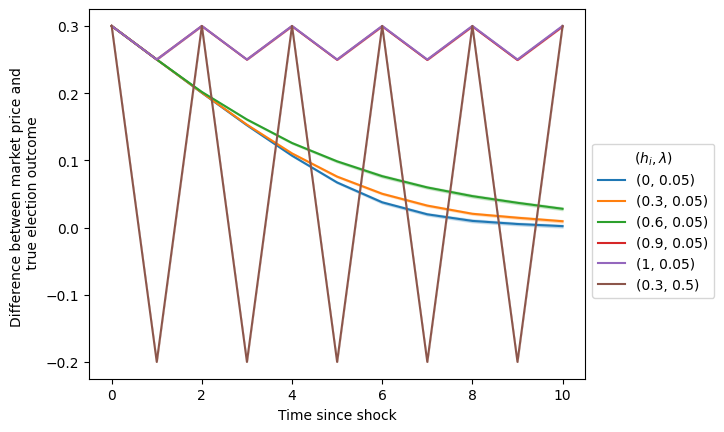

In [27]:

sns.lineplot(data = df_plot, x='T', y='SE',hue='Case')
plt.xlabel('Time since shock')
plt.legend(title = r'$(h_i,\lambda)$', loc='lower left', bbox_to_anchor=(1,0.2))
plt.ylabel('Difference between market price and \n true election outcome')
plt.savefig('MarketImitationShock.pdf')

## now with one whale

In [ ]:
cases = [(1,0,0),(0,1,0),(0,0,1),(0,0.5,0.5),(0.5,0.5,0)]

KeyboardInterrupt: 

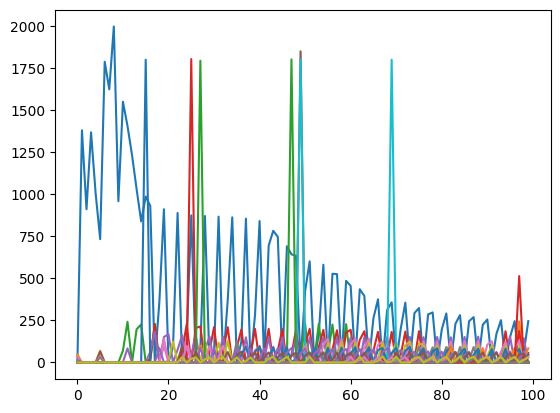

In [ ]:
N_bettors = 20
av_budget=100
prop_whale = 0.3
N_whales = 1



alpha_store_shock = {}


for case in cases:
    alpha_effect = []
    parameters = {'n_bettors': N_bettors, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': T_max, # Time until election takes place (ie. time horizon of betting)
            'initial_price': initial_price, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': rw_variance} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


    b_numbers = N_bettors*np.array(case)
    b_numbers = [int(x) for x in b_numbers]

    alpha_1_bettors = [bettor(budget=av_budget, market_imitation = 0, stubbornness=0.01) for i in range(b_numbers[0])]
    alpha_neg1_bettors = [bettor(budget=av_budget, market_imitation = 0.2, stubbornness=0.01) for i in range(b_numbers[1])]
    no_alpha_bettors = [bettor(budget=av_budget, market_imitation = 0.7, stubbornness=0.01) for i in range(b_numbers[2])]

    # whale
    whale_budget = av_budget*N_bettors*prop_whale / (1-prop_whale)
    whale_bettors = [bettor(budget=whale_budget, whale=True, market_valuation=1) for _ in range(N_whales)]

    parameters.update({'bettors': alpha_1_bettors + alpha_neg1_bettors + no_alpha_bettors + whale_bettors})

    for _ in range(n_iter_):
        market_record = run_market(**parameters)

        alpha_effect.append((np.array(market_record['price_history']) -  np.array(market_record['gen_el'])))

        var_save.append(np.var(market_record['price_history']))

    alpha_store_shock[case] = alpha_effect

In [ ]:
times = np.arange(T_max+1)
vals = []
for k,val in alpha_store_shock.items():
    for v in val:
        for x in range(T_max+1):
            vals.append([k,v[x],times[x]])


df_plot = pd.DataFrame(vals, columns = ['Case','SE','T'])


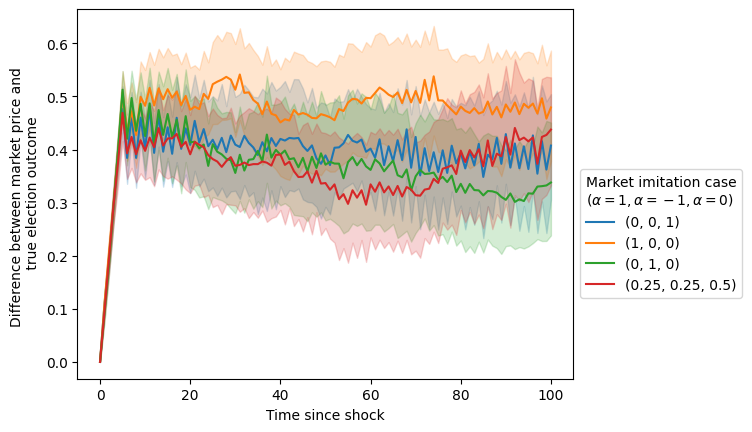

In [ ]:

sns.lineplot(data = df_plot, x='T', y='SE',hue='Case')
plt.xlabel('Time since shock')
plt.legend(title = 'Market imitation case\n'+ r'$(\alpha=1,\alpha=-1,\alpha=0)$', loc='lower left', bbox_to_anchor=(1,0.2))
plt.ylabel('Difference between market price and \n true election outcome')
plt.savefig('MarketImitationShockWhale.pdf')

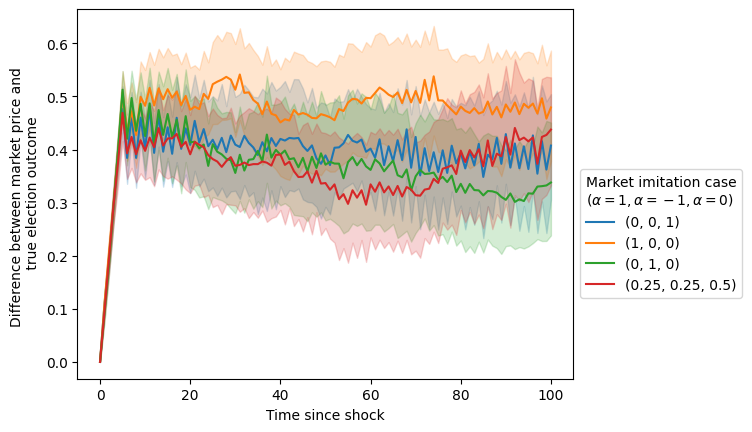

In [ ]:

sns.lineplot(data = df_plot, x='T', y='SE',hue='Case')
plt.xlabel('Time since shock')
plt.legend(title = 'Market imitation case\n'+ r'$(\alpha=1,\alpha=-1,\alpha=0)$', loc='lower left', bbox_to_anchor=(1,0.2))
plt.ylabel('Difference between market price and \n true election outcome')
plt.savefig('MarketImitationShockWhale.pdf')

## nice market picture

In [12]:
cases = [(0,0,1),(1,0,0),(0,1,0),(0.25,0.25,0.5)]

In [13]:
np.random.seed(41)
T_max=100

In [14]:
gen_el_res = gen_election(0.5, T_max, rw_variance)

<Axes: >

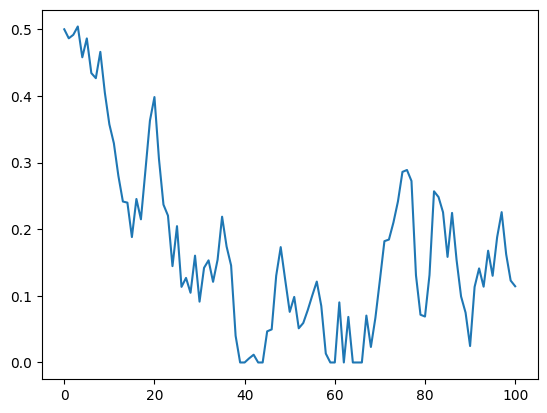

In [15]:
sns.lineplot(gen_el_res)

In [16]:
N_bettors = 100
av_budget=1000
prop_whale = 0.2
N_whales = 1
T_max=100


records = {}


for case in cases:
    alpha_effect = []
    parameters = {'n_bettors': N_bettors, # The number of betting agents
                #'el_outcome': 1, # Q: Ultimate election outcome - assuming we know this to begin with and it does not change over time...for now this is implemented as a random walk of the probability...but should this be 0 or 1 instead? '''
            't_election': T_max, # Time until election takes place (ie. time horizon of betting)
            'initial_price': initial_price, # Initial market price (is this equivalent to probability of winning)
            'outcome_uncertainty': rw_variance,
            'gen_el' : gen_el_res,
            'k':3} # This is a measure of how uncertain the true outcome is - ie. the volatility of the random walk election probability


    b_numbers = N_bettors*np.array(case)
    b_numbers = [int(x) for x in b_numbers]

    alpha_1_bettors = [bettor(budget=av_budget, market_imitation = 1) for i in range(b_numbers[0])]
    alpha_neg1_bettors = [bettor(budget=av_budget, market_imitation = -1) for i in range(b_numbers[1])]
    no_alpha_bettors = [bettor(budget=av_budget, market_imitation = 0) for i in range(b_numbers[2])]



    # whale
    whale_budget = av_budget*(np.sum(b_numbers))* prop_whale / (1-prop_whale)
    whale_bettors = [bettor(budget=whale_budget, whale=True, market_valuation=0.2) for _ in range(N_whales)]

    parameters.update({'bettors': alpha_1_bettors + alpha_neg1_bettors + no_alpha_bettors + whale_bettors})

    market_record = run_market_fixed_el(**parameters)

    records[case] = market_record


TypeError: run_market_fixed_el() got an unexpected keyword argument 'k'

In [57]:
rec = records[case]
step = False
scale_fact = 10

In [58]:
times = np.arange(T_max+1)

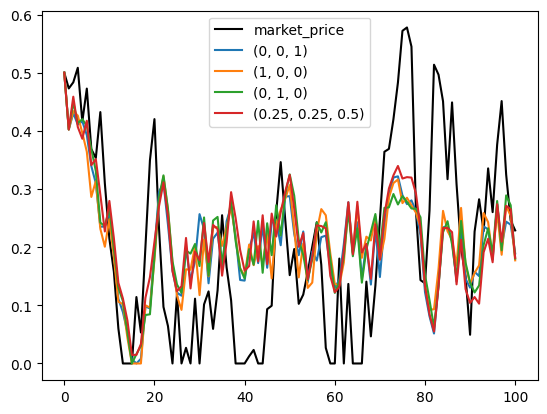

In [61]:
sns.lineplot(x=times, y=gen_el_res, c='black', label='market_price')

for case in cases:
    ph =records[case]['price_history']
    sns.lineplot(x=times, y=ph, label = case)